In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, pacf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.random.seed(123456)

In [2]:
data = pd.read_csv('BTC-USD.csv')

# Data Cleaning

In [3]:
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', drop = True, inplace = True)

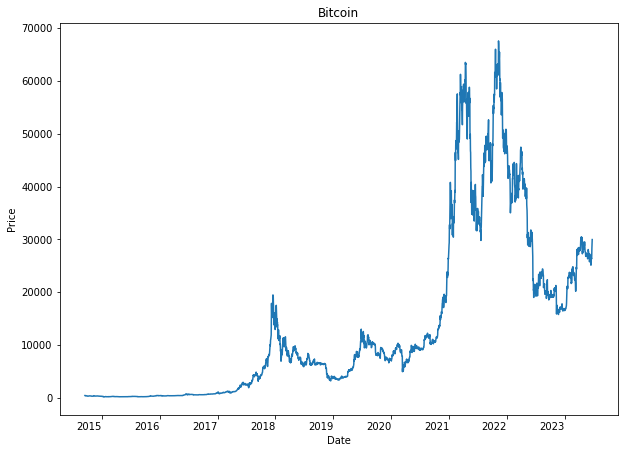

In [4]:
plt.figure(figsize = (10, 8))
data.Close.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin')
plt.xticks(rotation = 0)
plt.show()

# Autocorrelation function
### detect if bitcoin is nonstationary

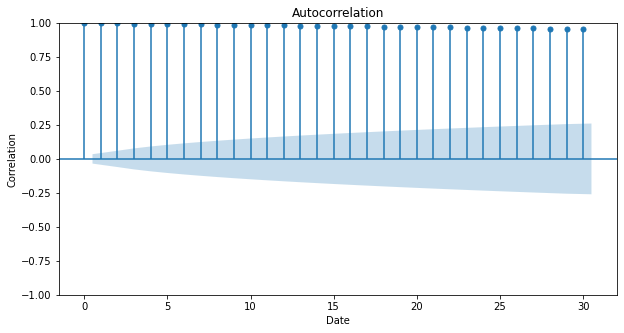

In [5]:
fig, axes = plt.subplots(figsize = (10, 5))
plot_acf(data.Close, axes, lags = 30)
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

# Create difference column getting stationary data
$$p = \frac{t_n - t_{n-1}}{t_{n-1}}$$

In [6]:
data['diffs'] = (data.Close.diff() / data.Close.shift(periods = 1, fill_value = 0)).fillna(0)

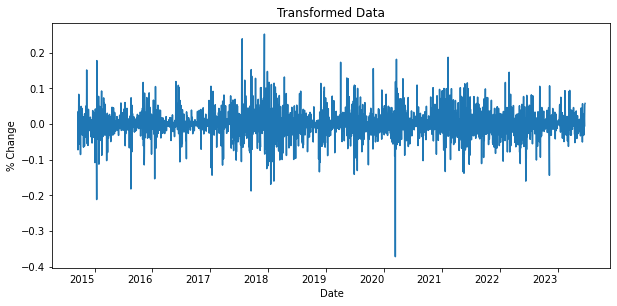

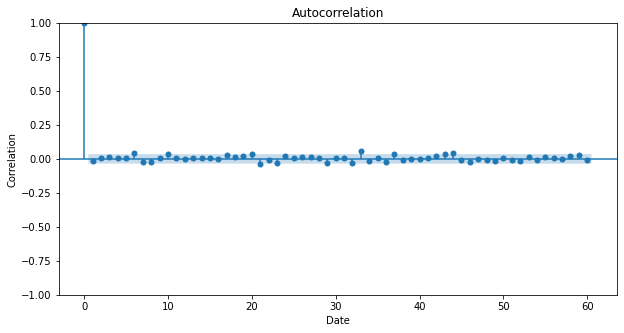

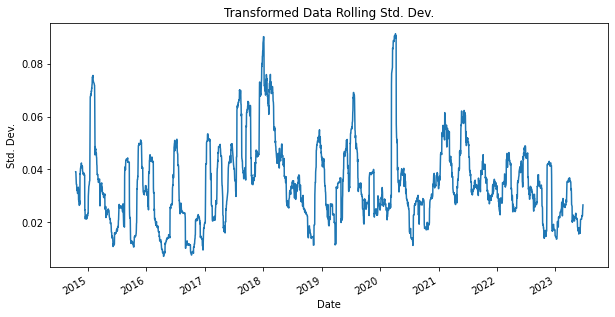

In [7]:
plt.figure(figsize = (10, 5))
data.diffs.plot()
plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('Transformed Data')
plt.xticks(rotation = 0)
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
plot_acf(data.diffs, axes, lags = 60)
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

plt.figure(figsize = (10, 5))
data.diffs.rolling(30).std().plot()
plt.xlabel('Date')
plt.ylabel('Std. Dev.')
plt.title('Transformed Data Rolling Std. Dev.')
plt.show()

# Create target
### percentage change as target

In [165]:
diffs = (data.Close.diff() / data.Close.shift(periods = 1, fill_value = 0)).values[1:]
diffs_len = len(diffs)

# Create features

In [34]:
def Create_X_data(diffs_len, lags):
    diff_data = np.zeros((diffs_len, lags))
    diff_data
    for lag in range(1, lags+1):
        this_data = diffs[: -lag]
        diff_data[lag:, lag-1] = this_data
    return diff_data

In [57]:
x_data = Create_X_data(diffs_len, 20) * 100
x_data = np.around(x_data, decimals = 8)
y_data = diffs * 100
y_data = np.around(y_data, decimals = 8)

# Multi-linear regression

In [129]:
lr = LinearRegression()
window = 150
preds = np.zeros(diffs_len - window)
for i in range(preds.shape[0] - 1):
    x_train = x_data[i: i + window, :]
    y_train = y_data[i: i + window]
    lr.fit(x_train, y_train)
    preds[i] = lr.predict(x_data[i + window + 1, :].reshape(1, -1))

In [164]:
print(f'Percentage of MSE: {metrics.mean_absolute_error(y_data[window:], preds):.2f}%')

Percentage of MSE: 2.77%


In [152]:
data

Open     High      Low    Close  Adj Close         Volume  \
Date                                                                       
2014-09-17   465.86   468.17   452.42   457.33     457.33    21056800.00   
2014-09-18   456.86   456.86   413.10   424.44     424.44    34483200.00   
2014-09-19   424.10   427.83   384.53   394.80     394.80    37919700.00   
2014-09-20   394.67   423.30   389.88   408.90     408.90    36863600.00   
2014-09-21   408.08   412.43   393.18   398.82     398.82    26580100.00   
...             ...      ...      ...      ...        ...            ...   
2023-06-17 26328.68 26769.39 26174.49 26510.68   26510.68 11090276850.00   
2023-06-18 26510.46 26675.93 26325.89 26336.21   26336.21  9565695129.00   
2023-06-19 26335.44 26984.61 26312.83 26851.03   26851.03 12826986222.00   
2023-06-20 26841.66 28388.97 26668.79 28327.49   28327.49 22211859147.00   
2023-06-22 29976.87 30483.29 29679.16 29974.18   29974.18 24801013760.00   

            diffs  
Date               
2014-09-17   0.00  
2014-09-18  -0.07  
2014-09-19  -0.07  
2014-09-20   0.04  
2014-09-21  -0.02  
...           ...  
2023-06-17   0.01  
2023-06-18  -0.01  
2023-06-19   0.02  
2023-06-20   0.05  
2023-06-22   0.06  

[3200 rows x 7 columns]

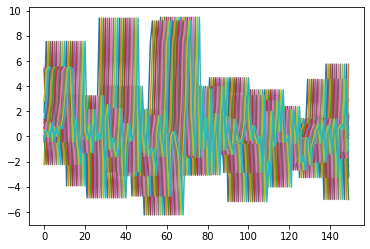

In [146]:
s = x_data[3046:3196, :]
a = y_data[3046:3196]
plt.plot(s)
plt.show()

In [137]:
lr.fit(s,a)

LinearRegression()

In [139]:
x_data.shape

(3199, 20)

In [147]:
x_data[3197, :].reshape(1, -1)

array([[ 1.95478525, -0.65808541,  0.69590029,  2.93656856,  1.79790877,
        -3.06362534,  0.06265232, -0.14521097,  0.34399794, -2.37585293,
        -0.10503082,  0.61572444, -3.27762496,  5.74021716, -5.01111922,
         0.16227993, -0.64023326,  1.60185543, -1.46837093, -1.74242045]])

In [148]:
lr.predict(x_data[3197, :].reshape(1, -1))

array([0.81056473])

In [149]:
y_data[-2]

5.49870535